# Time-series stationarity - Eliminating Trends

## Objectives

* Check the stationarity in a time-series in terms on trend and seasonality. 
* Use log transformations as a first step to minimize non-stationarity.
* Use smoothing techniques (rolling estimates) with Moving Average (MA) and Weighted Moving Average (WMA).
* Compare the results of MA and WMA using statistical tests. 

## Introduction

Although stationarity assumption is required in major time-series modelling techniques, almost none of practical time-series are stationary. In this lab we shall discuss how to make a time-series stationary. In reality, it is almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:

>**Trend: Varying mean over time**. 

>**Seasonality: Variations at specific time-frames.**



![](http://radacad.com/wp-content/uploads/2017/07/trendseasonal.png)



In the last lab, we saw that on average, the number of passengers was growing over time i.e. increase in trend. We also saw some seasonlity, reflecting specific times of year when people travel more. 

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series in order to get a stationary series. Statistical modelling techniques can then be implemented on this series. The final step would be to convert the modelled values into the original scale by applying trend and seasonality constraints back.

## Estimating & Eliminating Trend

Let's load necessary libraries and the air passengers dataset from last lab and convert that into a time-series object. 

In [16]:
#Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.tsa.stattools import adfuller

# Import passengers.csv and set it as a time-series object. Plot the TS
data = pd.read_csv('passengers.csv')
ts = data.set_index('Month')
ts.index = pd.to_datetime(ts.index)
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


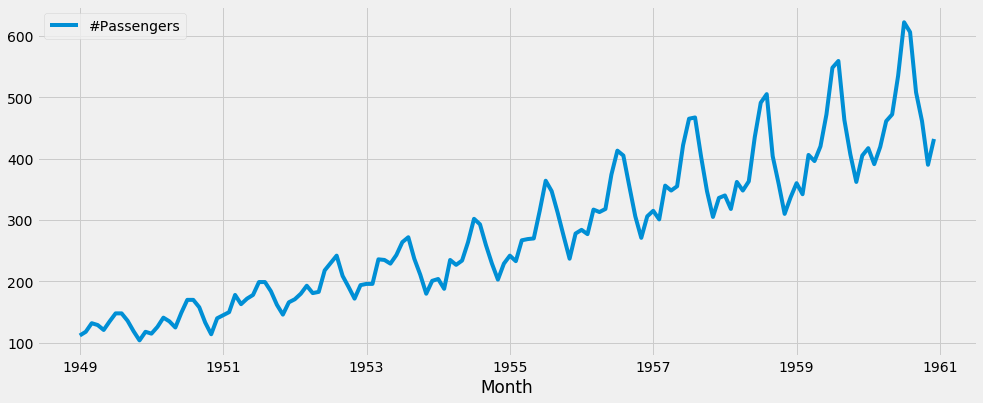

In [17]:
ts.plot();

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

Results of Dickey-Fuller Test:

Test Statistic:	0.8153688792060456
p-value:	0.991880243437641
#Lags Used:	13
Number of Observations Used:	130
Critical Values:	{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


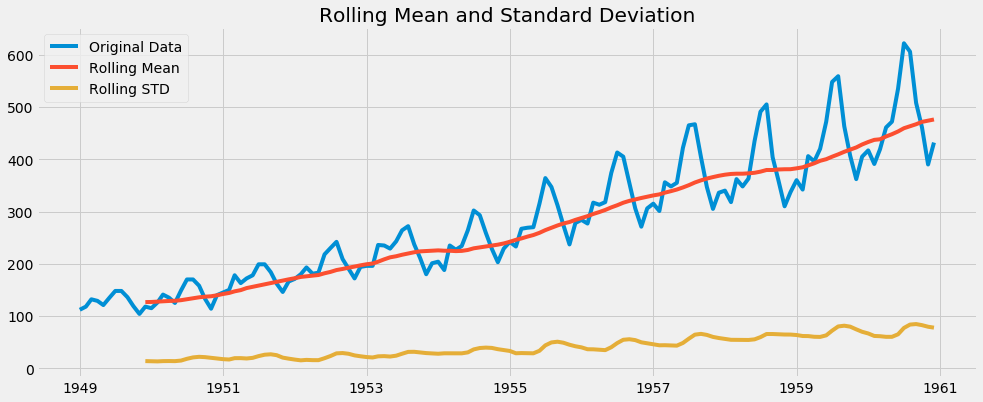

In [60]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    ts = TS
    # Perform the dickey Fuller test
    df_test = adfuller(ts[ts.columns[0]])
    # Extract and display test results in a user friendly manner
    results = ['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical Values']
    
    for c, stat in enumerate(df_test[:-1]):
        if c == 0:
            print('Results of Dickey-Fuller Test:\n')
        print(results[c] + ':\t' + str(stat))
        
    #calculate rolling mean and std
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    
    plt.plot(ts,label='Original Data')
    plt.plot(rolmean,label='Rolling Mean')
    plt.plot(rolstd,label='Rolling STD')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend(loc='best');

stationarity_check(ts)

### Log Transformation

One of the first tricks to enforce stationarity can be simple log transformation to make the time-series more "uniform" over time. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. 

Lets take a log transform here for simplicity. use numPy's `np.log()` to get the log transform of the TS and compare the output with original TS. 

In [24]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)

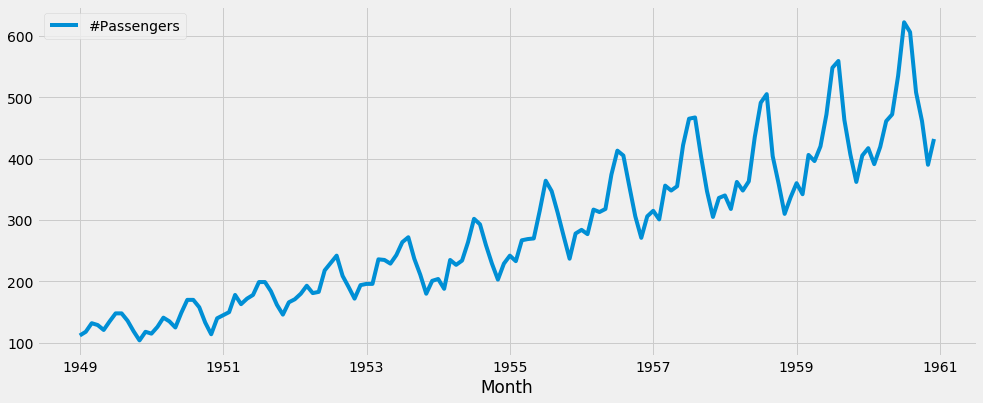

In [26]:
ts.plot();

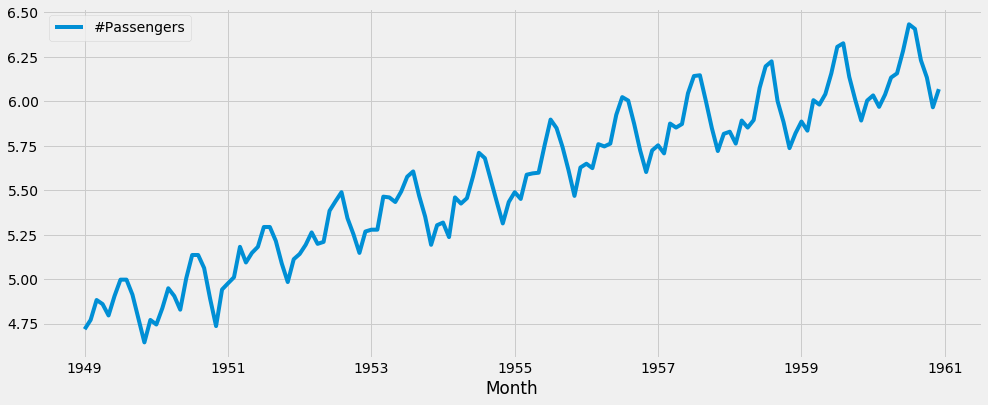

In [28]:
ts_log.plot();

We can see above the peaks in the time-series, representing seasonality are looking more uniform. In this simple case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

We shall discuss the smoothing approach here which refers to rolling estimates as seen in the previous lab. It involves considering past events in context of current event to identify trends on data. Smoothing can be performed using moving average **MA**. 

## Moving Average (MA)

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics. We shall use `pandas.DataFrame.rolling()` function with the log time-series `ts_log`  to achieve this. We shall use a window size of 12 to represent 1 year. 


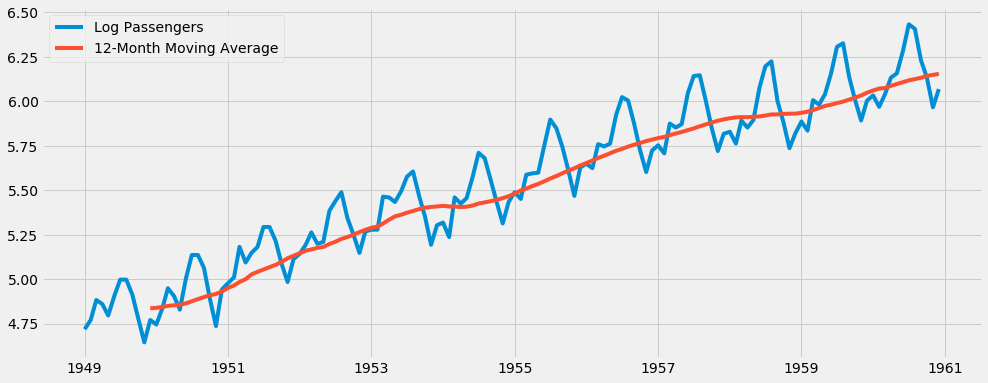

In [36]:
# Calculate the rolling mean of ts_log as moving_average
moving_avg = ts_log.rolling(12).mean()

# Plot ts_log and moving average in an overlapping manner to few the effect
plt.plot(ts_log,label='Log Passengers')
plt.plot(moving_avg,label='12-Month Moving Average')
plt.legend();

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. Let's subtract these values and check for Nans for undefined values. 

In [38]:
# Subtract the moving average from log transformed time-series and check head for Nans
ts_log_moving_avg_diff = ts_log - moving_avg

ts_log_moving_avg_diff.head(15)


# 	#Passengers
# Month	
# 1949-01-01	NaN
# 1949-02-01	NaN
# 1949-03-01	NaN
# 1949-04-01	NaN
# 1949-05-01	NaN
# 1949-06-01	NaN
# 1949-07-01	NaN
# 1949-08-01	NaN
# 1949-09-01	NaN
# 1949-10-01	NaN
# 1949-11-01	NaN
# 1949-12-01	-0.065494
# 1950-01-01	-0.093449
# 1950-02-01	-0.007566
# 1950-03-01	0.099416

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


Notice the first 11 being NaNs. Lets drop these values.

In [42]:
# Drop the NaN values from timeseries calculated above
ts_log_moving_avg_diff=ts_log_moving_avg_diff.dropna()
ts_log_moving_avg_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


We can now use the `check_stationarity()` function we created earlier to measure to calculate rolling statistics and run adfuller test.

Results of Dickey-Fuller Test:

Test Statistic:	-3.162907991300844
p-value:	0.02223463000124475
#Lags Used:	13
Number of Observations Used:	119
Critical Values:	{'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


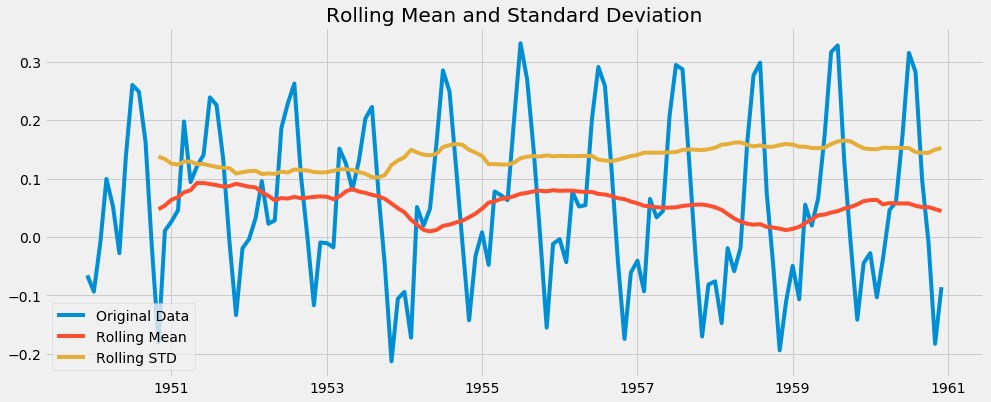

In [61]:
# Check stationarity of ts_log_moving_average
stationarity_check(ts_log_moving_avg_diff)

This looks much better . The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

## Weighted Moving Average (WMA)

A drawback with MA approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘Weighted Moving Average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is **Exponentially Weighted Moving Average** where weights are assigned to all the previous values with an exponential decay factor.This can be implemented in Pandas with `pandas.DataFrame.ewm()` method. Details of Pandas ewma can be found [HERE](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html). Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. Now, let’s remove this from series and check stationarity.

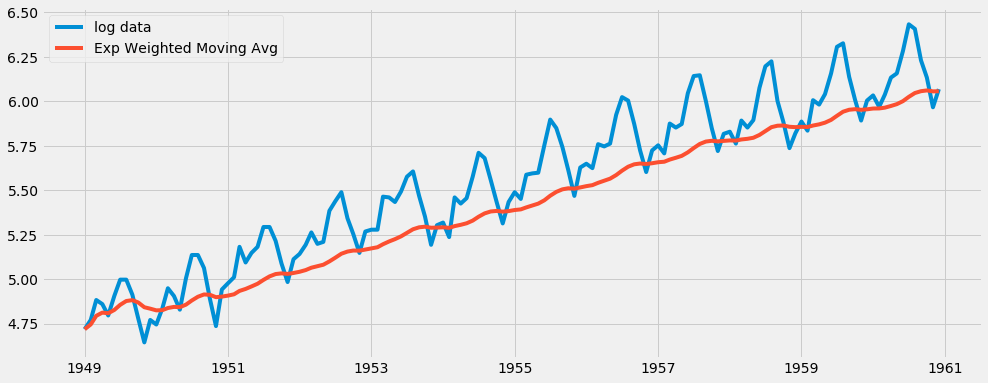

In [58]:
# Use Pandas ewm() to calculate Weighted Moving Average of ts_log
expweighted_avg = ts_log.ewm(halflife=12).mean()

# Plot the original ts with weighted average
plt.plot(ts_log,label='log data')
plt.plot(expweighted_avg,label='Exp Weighted Moving Avg')
plt.legend(loc='best');

As above, we can subtract WMA time-series from the original and run the stationarity test. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

Results of Dickey-Fuller Test:

Test Statistic:	-3.6012624201616763
p-value:	0.005736938801511891
#Lags Used:	13
Number of Observations Used:	130
Critical Values:	{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


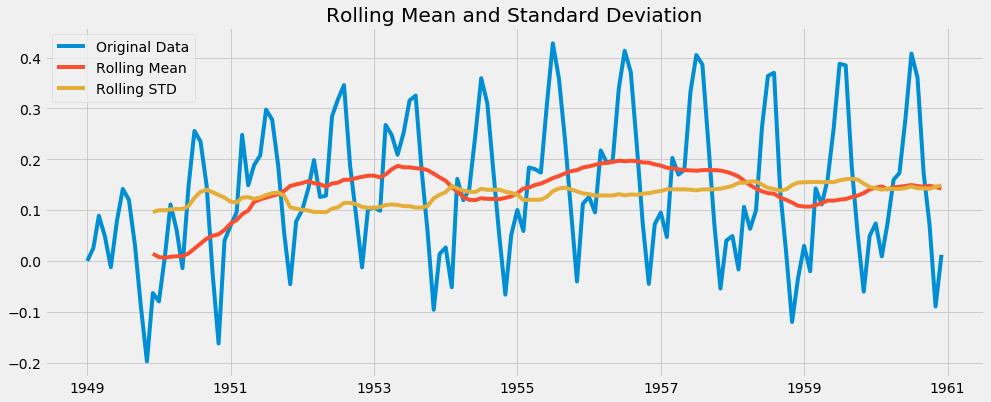

In [62]:
# subtract the WMA from original TS and check stationarity
ts_log_ewma_diff = ts_log - expweighted_avg

stationarity_check(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. 

## Summary 

In this lab, we learnt to measure the stationarity in a timeseries. We used Moving Average (MA) and Weighted Moving Average (WMA) to remove the trend in the time-series. In the next Lab, we shall see how to measure and remove seasonality in a time-series object. This would get our time-series ready for predictive modelling in following labs. 